$
    \newcommand{\PP}[1]{\mathbf{P}\left(#1 \right)}
    \newcommand{\Var}[1]{\mathrm{Var}\left[#1\right\]}
    \newcommand{\E}[1]{\mathrm{E}\left[#1\right\]}
    \renewcommand{\exp}[1]{\mathrm{exp}\left[#1\right]}
$

# Math 451: Homework 6
## Continuous Univariate Random Variables, part I

- Submitted 11/5/17 by Colton Grainger for Math 451-1: Probability Theory, Engineering Outreach
- **Text:** *Stochastic Modeling and Mathematical Statistics* by Francisco J. Samaniego, CRC Press

### 3.7 Prob 1

Consider the non-negative function $f(x) = kx^2(1-x)$ 
restricted to the domain $(0,1)$. 

a) Let's find the constant of proportionality $k$ such that 
$f$ is a legitimate density function for the "MLTN" distribution $\sim X$.

We require $\int f = 1$, so $\frac1k = \int_0^1 x^2 (1-x)\, dx$ 
and thus $ k =12$.

b) Let's find the expected value of $X$, given its density is now known.

$$E[X] = \int_0^1 x \cdot 12 x^2 (1-x)\, dx = \frac35.$$

c) As $f$ is a polynomial in $x$, we may easily obtain $X$'s 
higher order moments by integrating, e.g., the second moment is

In [1]:
f = 12*x^2*(1-x)

def moment(f,n):
    return integrate(x^n*f, (x, 0, 1))

moment(f, 2)

2/5

From the familiar relation $\sigma_X^2 = E[X^2] - (E[X])^2$ we calculate the variance to be

In [2]:
moment(f,2) - (moment(f,1))^2

1/25

### 3.7 Prob 5
Let $X \sim U(0,1)$. Then suppose $R$, a function of $x \in X$, is the random variable  representing the ratio of segments, shorter $S$ to the longer $L$, with 

$$L= \max\{x, 1-x\} \quad S = \min\{x, 1-x\}.$$

We have $R(X(\Omega)) = [0,1]$ as $0\leq S/L\leq 1$. 

Because $L$ and $S$ are symmetric in $x$ with respect to $1/2$, 
we have the set equality 
$$\{R\leq 1/3\} = \{X \leq 1/4\} \cup \{X \geq 3/4\}.$$

Thus $$ \PP{R\geq 1/3} = 1 - \PP{\{X \leq 1/4\} \cup \{X \geq 3/4\}} = \frac12.$$

### 3.7 Prob 16

Suppose $X$ is a random variable with cumulative distribution function

$$ F(t) = 1 - \exp{-x^2} \quad \text{for $x \in (0, \infty)$} 
    \quad \text{ else $F \equiv 0$.} $$
 
a) Here's the probability that $X$ is in the interval $(1,2)$.

$$\PP{1 \leq X \leq 2} = F(2) - F(1) 
    = \frac1e - \frac1{e^4}$$

b) Here's the pdf of $X$, found by differentiating the cdf. 

$$f_X(x) = \frac{dF}{dx} = 2xe^{-x^2}.$$

(This function, moreover, bears some resemblence to the 
Maxwell-Boltzman distribution arising in the [kinectic theory of gases](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution).)

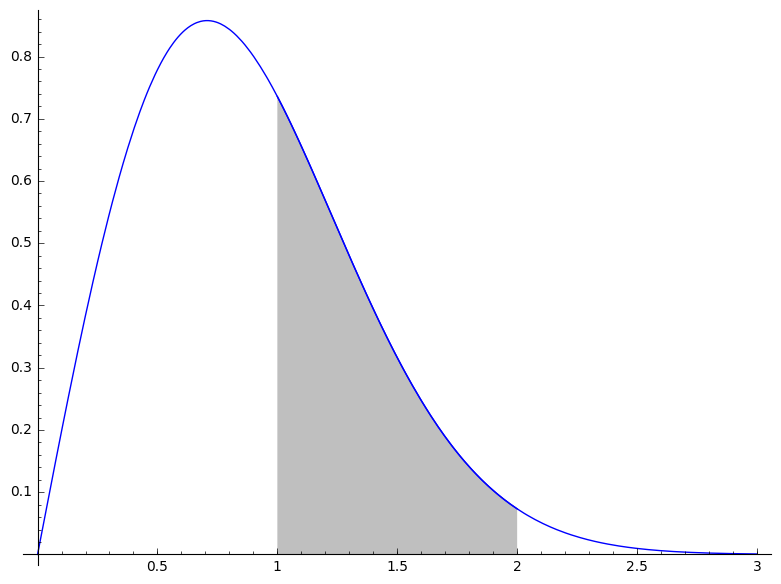

In [3]:
F = 1 - e^(-x^2)
f = diff(F, x)
p = plot(f, (x, 0, 3)) + plot(f, (x, 1, 2), fill = True)
p

c) We find the value $m$ such that $\PP{X \leq m} = 1/2.$

$$ F(m) = 1/2 \Leftrightarrow 1/2 = e^{-m^2} 
    \Leftrightarrow m = \sqrt{\ln(2)}. $$

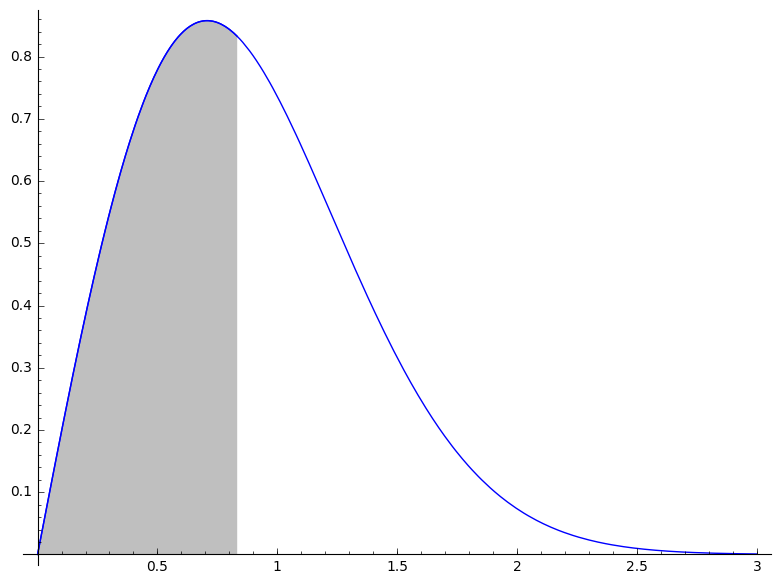

In [4]:
p = plot(f, (x, 0, 3)) + plot(f, (x, 0, sqrt(ln(2))), fill = True)
p

### 3.7 Prob 18
Suppose $X$ is a random variable representing $|z|$, where the point $z$ is chosen from
the unit disc at random. 

Consider a distance $r \in [0,1]$. To find $\PP{X < r}$, we need to 
account for all of the probability mass in the disc $|z| < r$, which I claim is $\frac1\pi \cdot \pi r^2$. (As a probability mass of $1$ is distributed uniformly throughout the unit disc, the density of mass per unit area is $1/\pi$.)

It follows that the cumulative density function is given by
$$ F(r) = 
    \begin{cases}
        0 & \text{for $r<0$},\\
        r^2 & \text{for $r \in [0,1]$},\\
        1 & \text{else.}
    \end{cases} $$

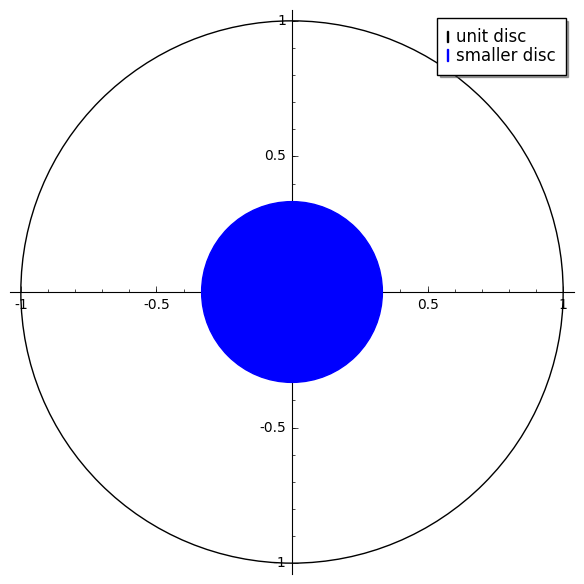

In [5]:
C = circle((0,0), 1, legend_label='unit disc', color = 'black')
r = circle((0,0), 1/3, fill = True, legend_label = 'smaller disc')
show(C + r)

### 3.7 Prob 21
Suppose $X \sim U(0,1)$. Its cdf is given by $F_X(t) = t$, restricted to $t \in [0,1]$. Suppose $Y$ is also an RV with $Y^2 = X$. What's the cdf of $Y$?

$$ \begin{align}
    F_Y(t) &= \PP{Y \leq t}\\
        &= \PP{X \leq t^2} \\
        &= F_X(t^2) \\
        &= t^2. 
    \end{align}$$

### 3.7 Prob 27
Suppose $U, V$ are independent gamma distributed RVs 
with parameters $(1,\mu)$.  Then $U, V \sim \mathrm{Exp}(\mu^{-1})$. 
If $W = \min(U, V)$, we have the set equality

$$ \{ W \geq w \} = \{U \geq w \} \cap\{V \geq w \}.$$

Noticing $W \geq w$ is a strong hypothesis, we obtain $W$'s cdf:

$$ \begin{align}
    \PP{W\leq w} &= 1 - \PP{W \geq w}\\
        & = 1 - \PP{\{U \geq w \} \cap\{V \geq w \}}\\
        & = 1 - (\exp{-w/\mu})^2  &\text{(independent RVs)}\\
        & - 1 - \exp{\frac{-2w}\mu}.
    \end{align} $$

Whence $W \sim \mathrm{Exp}(2/\mu)$. 

*In general*, suppose $X_i \sim \Gamma(1, \mu)$ for $i \in \{1, \ldots, n\}$. If $W = \min\{X_i\}$, then $W \sim \mathrm{Exp}(n/\mu)$.

### 3.7 Prob 28

Consider a RV $X$ with density given by 
$$ f(t)  =  2(t-1) \text{for $1< x< 2$, else zero.} $$

- We show the density is normalized, $\int f = 1$.
- We calculate the expected value $E[X]$.
- We integrate to determine the cdf $F(t)$.

In [6]:
# the pdf is normalized
f = 2*(x-1)
integrate(f, (x, 1, 2))

1

In [7]:
# here's the expected value of X
integrate(x*f, (x, 1, 2))

5/3

In [8]:
# here's the cdf
integrate(f, x)

x^2 - 2*x

### 3.7 Prob 29

Suppose the lifetime of a bulb (in hours) is modeled by an exponential RV with mean $12000$ hours. Let $X \sim \mathrm{Exp}(1/12000).$ The probability that a bulb will last less than $1000$ hours is 

In [9]:
mean = 12000
f = (1/mean)*e^(-(1/mean)*x)
N(integrate(f, (x, 0, 1000)))

0.0799555853706767

whence, under a frequentist interpretation of probability, approximately $\% 8$ of sold bulbs will burn out within $1000$ hours.

### 3.7 Prob 31

We prove that the Exponential ($\lambda$) distribution is the only absolutely continuous distribution with the **memorylessness property**, that is

$$ X\sim \mathrm{Exp}(\lambda) 
    \Leftrightarrow 
    \PP{X > t+h \ \big|\ X > t} = \PP{X > h} 
        \quad \text{for }\lambda, t, h > 0.$$

**Proof.** Suppose $X > t+h$ and $h > 0$. Then obviously $X > t$. 
We may now assert $ \{X > t+h\} \cap \{ X > t\} = \{X>t+h\}$. 
The definition of conditional probability then yields 

$$ \PP{X > t+h \ \big|\ X > t} = \frac{\PP{X > t+h}}{\PP{X > t}}.$$

($\Rightarrow$) If $X\sim \mathrm{Exp}(\lambda)$, then 

$$ \PP{X > t+h \ \big|\ X > t} = \frac{e^{-\lambda(t+h)}}{e^{-\lambda t}} = \PP{X > h}. $$

($\Leftarrow$) Assume memorylessness, then 

$$\PP{X > h}\PP{X > t} = \PP{X > t+h}.$$

Put $\phi(t) = \PP{X > t}$ for $t > 0$. Then $\phi$ satisfies 

$$\phi(t+h) = \phi(t)\phi(h).$$

By the product form of Cauchy's equation, there exists an $a \neq 0$ such that $$\phi(t) = e^{at}, \quad \text{for $t>0$}.$$ 

Since $\phi(t) = \PP{X > t} \to 0$ as $t \to \infty$, we must have $a < 0$. With $-\lambda = a$, we have $$X \sim \mathrm{Exp}(\lambda).$$


